In [1]:
import geopandas as gpd
import rasterio
import rasterstats
from rasterio.plot import show
import matplotlib.pyplot as plt
from rasterio.plot import show_hist
import pandas as pd

###### Importing District shapefile

In [2]:
district_data=gpd.read_file('Nepal Shapefile\hermes_NPL_new_wgs_2.shp')

<AxesSubplot:>

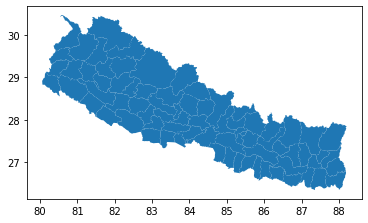

In [3]:
district_data.plot()

###### importing rainfall data

In [4]:
rfd=rasterio.open('Rainfall Data\\20210629.tif','r')

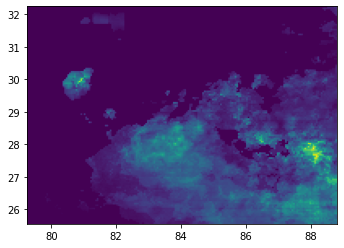

<AxesSubplot:>

In [5]:
show(rfd)

###### plotting raster and district together

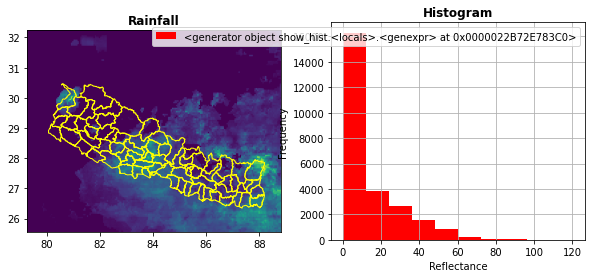

In [6]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
show(rfd,ax=ax1,title='Rainfall')
district_data.plot(ax=ax1,facecolor='None',edgecolor='yellow')
show_hist(rfd,title='Histogram',histtype='stepfilled',ax=ax2)
plt.xlabel('Reflectance')
plt.show()

###### Assign raster value to a numpy nd array

In [7]:
rainfall_array=rfd.read(1) # storing raster data in array

In [8]:
type(rainfall_array)

numpy.ndarray

In [9]:
rfd.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': nan,
 'width': 191,
 'height': 134,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.05000000074505806, 0.0, 79.25000386312604,
        0.0, -0.05000000074505806, 32.24999973550439)}

In [10]:
rfd.nodata

nan

In [11]:
affine=rfd.transform

###### Calculating the zonal statistics

In [12]:
average_rfd=rasterstats.zonal_stats(district_data,rainfall_array,affine=affine,
                                   stats=['mean'],
                                   geojson_out=True)

C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [13]:
average_rfd[2]['properties']

{'DISTRICT': 'Ilam',
 'OBJECTID': 3,
 'PROVINCE': 1,
 'PR_NAME': 'Province No 1',
 'mean': 28.901627604166666}

###### Extracting the average rainfall data from the list

In [14]:
average_rainfall=[]

In [15]:
i=0

In [16]:
while i<len(average_rfd):
    average_rainfall.append(average_rfd[i]['properties'])
    i=i+1

In [26]:
average_rainfall[22]

{'DISTRICT': 'Bhaktapur',
 'OBJECTID': 23,
 'PROVINCE': 3,
 'PR_NAME': 'Bagmati Pradesh',
 'mean': 8.444749450683593}

###### Transfering the information from the list to a pandas DataFrame

In [18]:
average_rainfall_nepal=pd.DataFrame(average_rainfall)

In [28]:
average_rainfall_nepal

,DISTRICT,OBJECTID,PROVINCE,PR_NAME,mean
0,Bhojpur,1,1,Province No 1,16.458288
1,Dhankuta,2,1,Province No 1,14.041781
2,Ilam,3,1,Province No 1,28.901628
3,Jhapa,4,1,Province No 1,50.347728
4,Khotang,5,1,Province No 1,14.023851
...,...,...,...,...,...
72,Dadeldhura,73,7,Sudurpashchim Pradesh,0.517544
73,Darchula,74,7,Sudurpashchim Pradesh,39.514068
74,Doti,75,7,Sudurpashchim Pradesh,0.000000
75,Kailali,76,7,Sudurpashchim Pradesh,0.827340


<AxesSubplot:title={'center':'Avearge rainfall in nepal on June 29'}, xlabel='DISTRICT'>

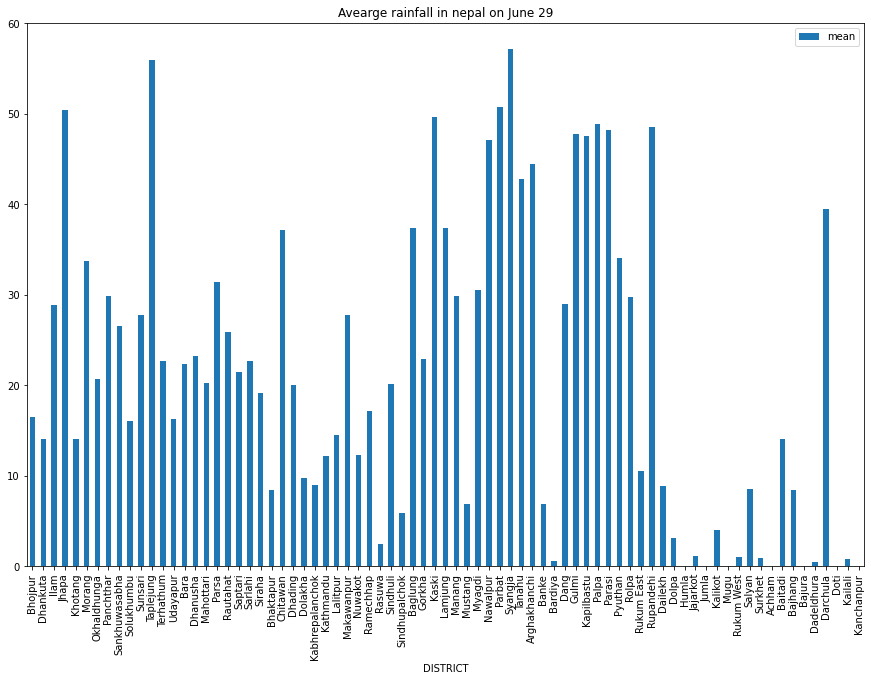

In [23]:
average_rainfall_nepal.plot(x='DISTRICT',y='mean',kind='bar',title='Avearge rainfall in nepal on June 29',figsize=(15,10))